In [10]:
import numpy as np
from matplotlib import pyplot as plt
import drehung

In [54]:
SAMPLE_SIZE=50

VOLUME_SAMPLE=int(1e5)

In [55]:
sample=[]
while len(sample)<SAMPLE_SIZE:
    sample_new=np.ones((4,4))-2*np.random.random((4,4))
    if not all([np.linalg.norm(i)<1 for i in sample_new]):
        continue
    sample.append([i/np.linalg.norm(i) for i in sample_new])

In [ ]:
def tetra(x):
    return np.array([[1,0,0,0],
                     [x,np.sqrt(1-x**2)],
                     [],
                     []])

In [56]:
volumes=[]
pointinesses=[]
for tetra in sample:
    pointsIn=0
    
    for _ in range(VOLUME_SAMPLE):
        point=np.ones((1,4))
        while np.linalg.norm(point)>1:
            point=np.ones((1,4))-2*np.random.random((1,4))
        point/=np.linalg.norm(point)
        inside=True
        for i in range(len(tetra)):
            vecs=np.copy(tetra)
            a=np.copy(vecs[3])
            vecs[3]=np.copy(vecs[i])
            vecs[i]=a
            vecs=drehung.orthonormalisierung(vecs)
            if(point@vecs[3]<0):
                inside=False
                break
        pointsIn+=inside
    volume=pointsIn/VOLUME_SAMPLE
    pointiness=8*np.pi
    for p1 in range(4):
        for p2 in range(4):
            if p1==p2:
                continue
            p3=(p2+1)%4
            if p3==p1:
                p3=(p3+1)%4
            vec1=tetra[p2]-tetra[p1]*tetra[p2]@tetra[p1]
            vec1/=np.linalg.norm(vec1)
            vec2=tetra[p3]-tetra[p1]*tetra[p3]@tetra[p1]
            vec2/=np.linalg.norm(vec2)
            angle=np.acos(vec1@vec2)
            pointiness-=angle
    volumes.append(volume)
    pointinesses.append(pointiness)


In [38]:
point=np.ones((1,4))
while np.linalg.norm(point)>1:
    point=np.ones((1,4))-2*np.random.random((1,4))
point

array([[ 0.12308642,  0.39914314,  0.66365056, -0.33776301]])

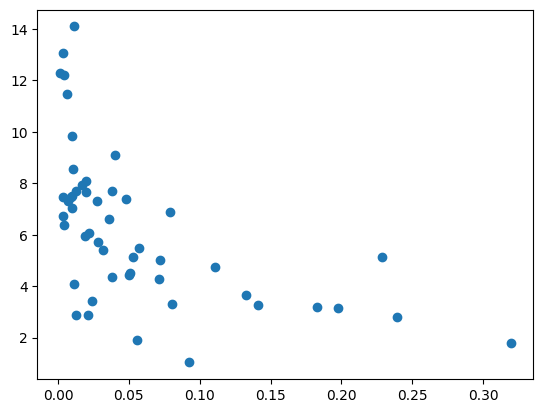

In [57]:
plt.scatter(volumes,pointinesses)